In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import operator


In [26]:
atmosphere_data = pd.read_csv('atmosphere_data1.csv')
print(atmosphere_data.head())
print(atmosphere_data.shape)

   humidity     pressure    rain    lightAvg  lightMax  moisture  temperature
0  87.64615  1027.830769  254.25    274.6232      4333   31.2385     24.06923
1  95.94805  1006.924675  339.75  14148.9787     54612  100.0000     21.20779
2  96.17143  1006.568571   38.25    134.9000      4000   93.2000     23.48571
3  98.58974  1009.415385   29.25    659.8889      4000    5.7692     21.79487
4  88.32710   991.654112    4.50   2168.3333      6295    4.2897     25.09346
(819, 7)


### Finding correlation between all the attributes

In [27]:
atmosphere_data.corr()

,humidity,pressure,rain,lightAvg,lightMax,moisture,temperature
humidity,1.000000,-0.443664,-0.574543,-0.372385,-0.320195,-0.153100,0.320420
pressure,-0.443664,1.000000,0.435406,0.212624,0.112181,0.105356,-0.586251
rain,-0.574543,0.435406,1.000000,0.539015,0.347064,0.451626,-0.187917
lightAvg,-0.372385,0.212624,0.539015,1.000000,0.634159,0.349297,-0.225644
lightMax,-0.320195,0.112181,0.347064,0.634159,1.000000,0.038260,-0.093311
moisture,-0.153100,0.105356,0.451626,0.349297,0.038260,1.000000,0.001578
temperature,0.320420,-0.586251,-0.187917,-0.225644,-0.093311,0.001578,1.000000


## Observations

#### We can observe that only humidity has a correlation value greater than 0.2 with temperature.
Therefore, we will use ***humidity as the only independent*** variable for building our linear and polynomial regressors

In [28]:
# Null check
print(atmosphere_data.isnull().sum())
# print(atmosphere_data["humidity"].isnull().sum())

humidity       0
pressure       0
rain           0
lightAvg       0
lightMax       0
moisture       0
temperature    0
dtype: int64


In [29]:
selected_input_columns = []

for col in atmosphere_data.columns:
    if (col != 'temperature') and atmosphere_data[col].corr(atmosphere_data['temperature']) > 0.2:
        selected_input_columns.append(col)

print("selected columns:",selected_input_columns)

X = atmosphere_data[selected_input_columns]
Y = atmosphere_data["temperature"]


selected columns: ['humidity']


In [30]:
# split data into training and test samples
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=5, shuffle=True)


# Linear Regression

In [31]:
# Build Linear regression model

# model = LinearRegression()
# model.fit(x_train, y_train)

In [32]:
# Predict training and testing values

# predicted_training_vals = model.predict(x_train)
# predicted_test_vals = model.predict(x_test)



In [33]:
# Calculate RMSE

# mse_train = mean_squared_error(y_train, predicted_training_vals)
# rmse_train = np.sqrt(mse_train)
# print(f"RMSE for training data: {rmse_train}")

# mse_test = mean_squared_error(y_test, predicted_test_vals)
# rmse_test = np.sqrt(mse_test)
# print(f"\nRMSE for test data: {rmse_test}")

In [34]:
# Plot the regression line

# plt.figure(figsize=[20,10])
# plt.scatter(x_train, y_train, c="red")
# plt.plot(x_train, predicted_training_vals, c='blue')
# plt.xlabel('humidity')
# plt.ylabel('temperature')
# plt.show()

# Polynomial Regression

In [39]:
# getting the vars ready
y_pred_test = {}
y_pred_train = {}

rmse_test = {}
rmse_train = {}


In [42]:
# Build models for varying degree of polynomial

for d in range(1,10):
    poly_features = PolynomialFeatures(degree=d)
    x_poly = poly_features.fit_transform(x_train)
    print(f"For degree = {d}, shape of polinomial features = {x_poly.shape}")
    lr_model = LinearRegression()
    lr_model.fit(x_poly, y_train) # model will be trained

    ypred_test = lr_model.predict(poly_features.fit_transform(x_test))
    y_pred_test[d] = ypred_test

    ypred_train = lr_model.predict(poly_features.fit_transform(x_train))
    y_pred_train[d] = ypred_train

    # calculate rmse
    mse_test = mean_squared_error(y_test, ypred_test)
    rmse_test[d] = np.sqrt(mse_test)

    mse_train = mean_squared_error(y_train, ypred_train)
    rmse_train[d] = np.sqrt(mse_train)



For degree = 1, shape of polinomial features = (573, 2)
For degree = 2, shape of polinomial features = (573, 3)
For degree = 3, shape of polinomial features = (573, 4)
For degree = 4, shape of polinomial features = (573, 5)
For degree = 5, shape of polinomial features = (573, 6)
For degree = 6, shape of polinomial features = (573, 7)
For degree = 7, shape of polinomial features = (573, 8)
For degree = 8, shape of polinomial features = (573, 9)
For degree = 9, shape of polinomial features = (573, 10)


In [43]:
# find minimum rmse value and currosponding poly degree
print(f"rmse_test = {rmse_test}")
best_degree_test = min(rmse_test, key=rmse_test.get)
print(f"\nFor degree = {best_degree_test}, RMSE = {rmse_test[best_degree_test]}")

print(f"\nrmse_train = {rmse_train}")
best_degree_train = min(rmse_train, key=rmse_train.get)
print(f"\nFor degree = {best_degree_train}, RMSE = {rmse_train[best_degree_train]}")

rmse_test = {1: 3.8978434305652367, 2: 3.940002565106517, 3: 3.9710347854040817, 4: 4.028943402997481, 5: 4.036764216895717, 6: 4.036132450513184, 7: 4.03633131441175, 8: 4.032564411710237, 9: 4.02534185368237}

For degree = 1, RMSE = 3.8978434305652367

rmse_train = {1: 3.818933685304276, 2: 3.8082388182740523, 3: 3.7845185131679573, 4: 3.72712025144037, 5: 3.724889944136558, 6: 3.7247238932695526, 7: 3.7248925310138037, 8: 3.7242205103296704, 9: 3.7220720557000013}

For degree = 9, RMSE = 3.7220720557000013


### Plot the polynomial curve for best degree

(573, 1)
(573,)


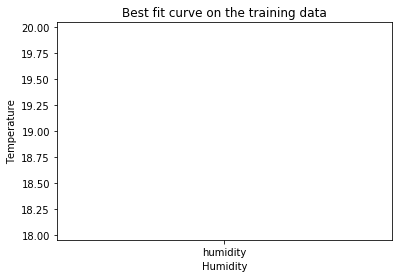

In [46]:
# x_to_plot = x_test.copy()
# ypred_to_plot = y_pred_test[1].copy()

# # plt.figure(figsize=[20,15])
# plt.scatter(x_test, y_test, c="red")

# sort_axis = operator.itemgetter(0)
# sorted_zip = sorted(zip(x_to_plot, ypred_to_plot),key = sort_axis)
# x_to_plot, ypred_to_plot = zip(*sorted_zip)

# plt.plot(x_to_plot, ypred_to_plot, c="blue")
# plt.show()

x_to_plot = x_train.copy()
ypred_to_plot = y_pred_train[9].copy()
print(x_to_plot.shape)
print(ypred_to_plot.shape)

# plt.figure(figsize=[20,15])
plt.scatter(x_train, y_train, c="red")

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_to_plot, ypred_to_plot), key=sort_axis)
x_to_plot, ypred_to_plot = zip(*sorted_zip)

plt.plot(x_to_plot, ypred_to_plot, c="blue")

plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.title("Best fit curve on the training data")

plt.show()